In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as no

In [50]:
df=pd.read_csv('train.csv')
df=df.drop(['Name','Ticket','Embarked','Sex','Cabin'],axis=1)
df['Age'].fillna(df.Age.median(),inplace=True)

In [65]:
X=df.drop(['Survived'],axis=1)
y=df['Survived']

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state =42)

In [53]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import recall_score, precision_score, f1_score

In [54]:
from sklearn.naive_bayes import GaussianNB

In [55]:
gnb_clf=GaussianNB()
gnb_clf.fit(X_train, y_train)

GaussianNB()

In [56]:
y_pred = gnb_clf.predict(X_test)

In [57]:
print("Accuracy Score :",accuracy_score(y_test,y_pred))

Accuracy Score : 0.6368715083798883


In [58]:
print("Recall Score",recall_score(y_test,y_pred))

Recall Score 0.34782608695652173


In [59]:
print("Precision Score :",precision_score(y_test,y_pred))

Precision Score : 0.5454545454545454


In [60]:
print("F1 Score :",f1_score(y_test,y_pred))

F1 Score : 0.4247787610619469


In [61]:
confusion_matrix(y_test, y_pred)

array([[90, 20],
       [45, 24]], dtype=int64)

In [63]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.82      0.73       110
           1       0.55      0.35      0.42        69

    accuracy                           0.64       179
   macro avg       0.61      0.58      0.58       179
weighted avg       0.62      0.64      0.62       179



C:\Users\kargu\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


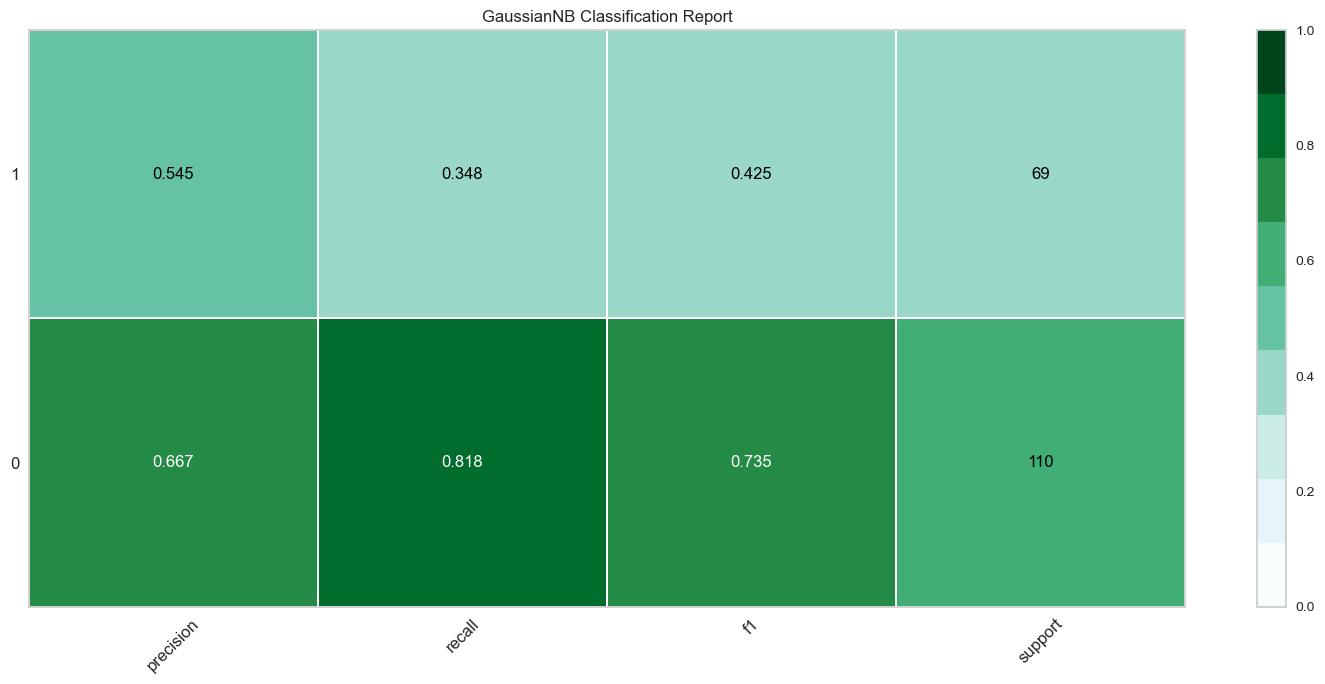

C:\Users\kargu\anaconda3\Lib\site-packages\yellowbrick\classifier\classification_report.py:322: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout()


In [64]:
import yellowbrick as yb
plt.figure(figsize=(15,7))
visualizer = yb.classifier.classification_report(gnb_clf, X_train, y_train, X_test, y_test,  support=True,cmap="BuGn")
visualizer.show()
plt.show()